# SABR Model Test Code

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import imp
import numpy as np
import matplotlib.pyplot as plt
#import sys
#sys.path.insert(sys.path.index('')+1, 'D:/Github/PyFENG')
import pyfeng as pf
import option_models as opt

np.set_printoptions(precision=3)

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [3]:
# Parameters
strike = np.linspace(75,125,num=25)
forward = 100
sigma = 0.2
texp = 1
vov = 0.5
rho = 0.25
beta = 1

In [4]:
# Create model
sabr_bsm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=beta)
#sabr_bsm.__dict__

In [5]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward, texp)
bsm_vol = sabr_bsm.vol_smile(strike, forward, texp)

price, bsm_vol

(array([25.631, 23.751, 21.924, 20.159, 18.465, 16.85 , 15.32 , 13.884,
        12.543, 11.302, 10.159,  9.115,  8.165,  7.306,  6.532,  5.838,
         5.217,  4.663,  4.17 ,  3.731,  3.342,  2.996,  2.689,  2.417,
         2.175]),
 array([0.204, 0.203, 0.202, 0.201, 0.2  , 0.2  , 0.2  , 0.2  , 0.201,
        0.202, 0.203, 0.204, 0.205, 0.206, 0.208, 0.21 , 0.211, 0.213,
        0.215, 0.217, 0.219, 0.221, 0.223, 0.225, 0.227]))

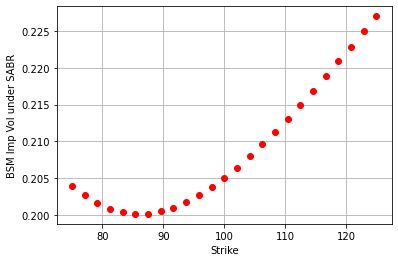

In [6]:
# volatility smile plot: try with different parameters
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (2) SABR for $\beta=0$

In [7]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20
texp = 1
alpha = 0.5
rho = -0.25

In [8]:
sabr_norm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=0)
price = sabr_norm.price(strike, forward, texp)
nvol = sabr_norm.vol_smile(strike, forward, texp, model='norm')

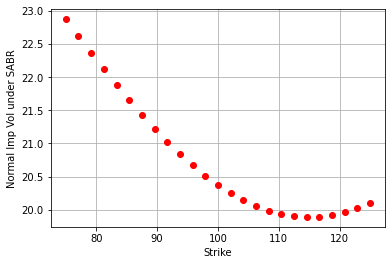

In [9]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (3) Smile calibration to 3 options

In [11]:
strike3 = np.array([90, 100, 110])
price3 = sabr_bsm.price(strike3, forward, texp)
vol3 = sabr_bsm.vol_smile(strike3, forward, texp)

price3, vol3

(array([13.608,  8.165,  4.769]), array([0.201, 0.205, 0.213]))

In [12]:
sabr_bsm.__dict__

{'sigma': 0.2,
 'intr': 0.0,
 'divr': 0.0,
 'is_fwd': False,
 'vov': 0.5,
 'rho': 0.25,
 'beta': 1}

In [13]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(vol3, strike3, forward, texp, is_vol=True)

{'sigma': 0.2000000000001008,
 'vov': 0.4999999998672808,
 'rho': 0.24999999998258432}

In [14]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(price3, strike3, forward, texp, is_vol=False)

{'sigma': 0.19999999979636335,
 'vov': 0.5000000129299839,
 'rho': 0.2499999894054446}

## 2. Pricing under MC method

In [127]:
strike = np.linspace(75,125,num=25)
forward = 100

In [128]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': 0.25, 'beta': 1}


In [129]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.631, 23.751, 21.924, 20.159, 18.465, 16.85 , 15.32 , 13.884,
        12.543, 11.302, 10.159,  9.115,  8.165,  7.306,  6.532,  5.838,
         5.217,  4.663,  4.17 ,  3.731,  3.342,  2.996,  2.689,  2.417,
         2.175]),
 array([25.626, 23.758, 21.94 , 20.18 , 18.485, 16.87 , 15.342, 13.91 ,
        12.575, 11.344, 10.213,  9.177,  8.232,  7.371,  6.59 ,  5.889,
         5.262,  4.701,  4.202,  3.758,  3.368,  3.024,  2.72 ,  2.447,
         2.204]))

Repeat the same for beta = 0

In [130]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormalMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.25, 'beta': 0}


In [131]:
#price_hagan = sabr_norm.price(strike, forward, texp)
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_mc.price(strike, forward, texp)
#price_mc
# make sure the two prices are similar
price_hagan, price_mc

(array([26.591, 24.753, 22.952, 21.192, 19.479, 17.818, 16.215, 14.675,
        13.206, 11.811, 10.497,  9.268,  8.129,  7.08 ,  6.125,  5.262,
         4.49 ,  3.807,  3.207,  2.686,  2.237,  1.854,  1.53 ,  1.257,
         1.03 ]),
 array([26.524, 24.695, 22.9  , 21.143, 19.429, 17.766, 16.161, 14.621,
        13.152, 11.761, 10.451,  9.225,  8.089,  7.049,  6.103,  5.252,
         4.487,  3.808,  3.206,  2.685,  2.236,  1.851,  1.523,  1.249,
         1.019]))

## 3. Pricing under conditional MC method

In [132]:
strike = np.linspace(75,125,num=25)
forward = 100

In [133]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': 0.25, 'beta': 1}


In [78]:
texp

1

In [137]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_cmc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.631, 23.751, 21.924, 20.159, 18.465, 16.85 , 15.32 , 13.884,
        12.543, 11.302, 10.159,  9.115,  8.165,  7.306,  6.532,  5.838,
         5.217,  4.663,  4.17 ,  3.731,  3.342,  2.996,  2.689,  2.417,
         2.175]),
 array([25.709, 23.816, 21.974, 20.194, 18.483, 16.851, 15.304, 13.849,
        12.49 , 11.229, 10.068,  9.005,  8.038,  7.163,  6.375,  5.668,
         5.036,  4.473,  3.973,  3.53 ,  3.138,  2.791,  2.484,  2.214,
         1.975]))

Repeat the same for beta = 0

In [135]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelNormalCondMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.25, 'beta': 0}


In [136]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_cmc.price(strike, forward, texp)
    
# make sure the two prices are similar
price_hagan, price_mc

(array([26.591, 24.753, 22.952, 21.192, 19.479, 17.818, 16.215, 14.675,
        13.206, 11.811, 10.497,  9.268,  8.129,  7.08 ,  6.125,  5.262,
         4.49 ,  3.807,  3.207,  2.686,  2.237,  1.854,  1.53 ,  1.257,
         1.03 ]),
 array([26.373, 24.526, 22.716, 20.949, 19.229, 17.564, 15.958, 14.418,
        12.95 , 11.56 , 10.251,  9.03 ,  7.899,  6.861,  5.917,  5.065,
         4.305,  3.633,  3.045,  2.535,  2.097,  1.725,  1.411,  1.148,
         0.93 ]))

## Compare the MC variance between brute-force MC and conditional MC
For this, you should not use the random number seed

In [138]:
brute_force_MC = []
conditional_MC = []
for i in range(100):
    price_mc0 = sabr_bsm_mc.price(strike, forward, texp,random = True)
    brute_force_MC.append(price_mc0)
    price_mc1 = sabr_bsm_cmc.price(strike, forward, texp,random=True)
    conditional_MC.append(price_mc1)
brute_force_MC = np.array(brute_force_MC )
conditional_MC  = np.array(conditional_MC )

In [139]:
brute_force_MC.shape

(100, 25)

## mean

In [140]:
#brute-force MC
bru_mean = brute_force_MC.mean(axis=0)
bru_mean

array([25.644, 23.766, 21.942, 20.18 , 18.489, 16.876, 15.35 , 13.914,
       12.573, 11.33 , 10.184,  9.135,  8.18 ,  7.315,  6.535,  5.834,
        5.205,  4.644,  4.143,  3.699,  3.304,  2.954,  2.643,  2.368,
        2.124])

In [141]:
#conditional MC
con_mean = conditional_MC.mean(axis=0)
con_mean

array([25.663, 23.769, 21.928, 20.147, 18.437, 16.805, 15.258, 13.803,
       12.445, 11.185, 10.024,  8.962,  7.996,  7.121,  6.334,  5.628,
        4.997,  4.435,  3.937,  3.495,  3.103,  2.758,  2.453,  2.183,
        1.946])

## var

In [142]:
#brute-force MC
bru_std =brute_force_MC.std(axis=0)
bru_std

array([0.188, 0.187, 0.186, 0.185, 0.182, 0.179, 0.176, 0.172, 0.168,
       0.164, 0.159, 0.155, 0.15 , 0.144, 0.14 , 0.136, 0.131, 0.126,
       0.121, 0.116, 0.111, 0.107, 0.102, 0.098, 0.095])

In [143]:
#conditional MC
con_std = conditional_MC.std(axis=0)
con_std

array([0.055, 0.055, 0.055, 0.056, 0.056, 0.056, 0.056, 0.056, 0.055,
       0.054, 0.053, 0.052, 0.051, 0.049, 0.048, 0.046, 0.044, 0.043,
       0.041, 0.039, 0.037, 0.035, 0.034, 0.032, 0.031])